In [60]:
import os
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

Cargando train...
Cargando test...

--- Shapes ---
train: (990, 194)
test : (594, 193)

--- Columnas (primeras 20) ---
['id', 'species', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5', 'margin6', 'margin7', 'margin8', 'margin9', 'margin10', 'margin11', 'margin12', 'margin13', 'margin14', 'margin15', 'margin16', 'margin17', 'margin18'] ... total: 194

--- Primeras filas de train ---


,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250



Número de clases: 99


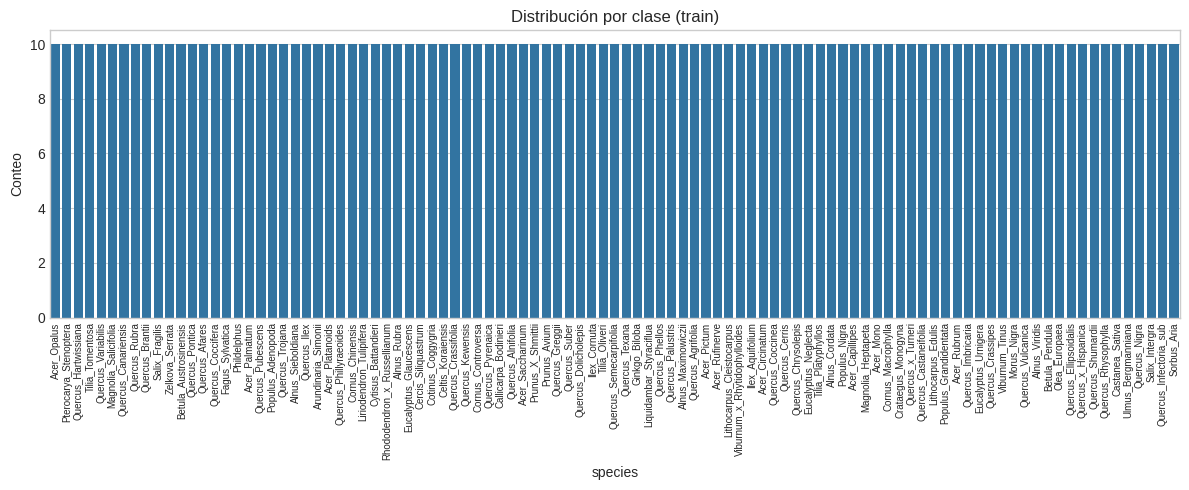


--- Estadísticas de las primeras 20 features numéricas ---


,count,mean,std,min,25%,50%,75%,max
margin1,990.0,0.017412,0.019739,0.0,0.001953,0.009766,0.025391,0.087891
margin2,990.0,0.028539,0.038855,0.0,0.001953,0.011719,0.041016,0.205080
margin3,990.0,0.031988,0.025847,0.0,0.013672,0.025391,0.044922,0.156250
margin4,990.0,0.023280,0.028411,0.0,0.005859,0.013672,0.029297,0.169920
margin5,990.0,0.014264,0.018390,0.0,0.001953,0.007812,0.017578,0.111330
margin6,990.0,0.038579,0.052030,0.0,0.000000,0.015625,0.056153,0.310550
margin7,990.0,0.019202,0.017511,0.0,0.005859,0.015625,0.029297,0.091797
margin8,990.0,0.001083,0.002743,0.0,0.000000,0.000000,0.000000,0.031250
margin9,990.0,0.007167,0.008933,0.0,0.001953,0.005859,0.007812,0.076172
margin10,990.0,0.018639,0.016071,0.0,0.005859,0.015625,0.027344,0.097656



Calculando correlación sobre 40 columnas (subset)...


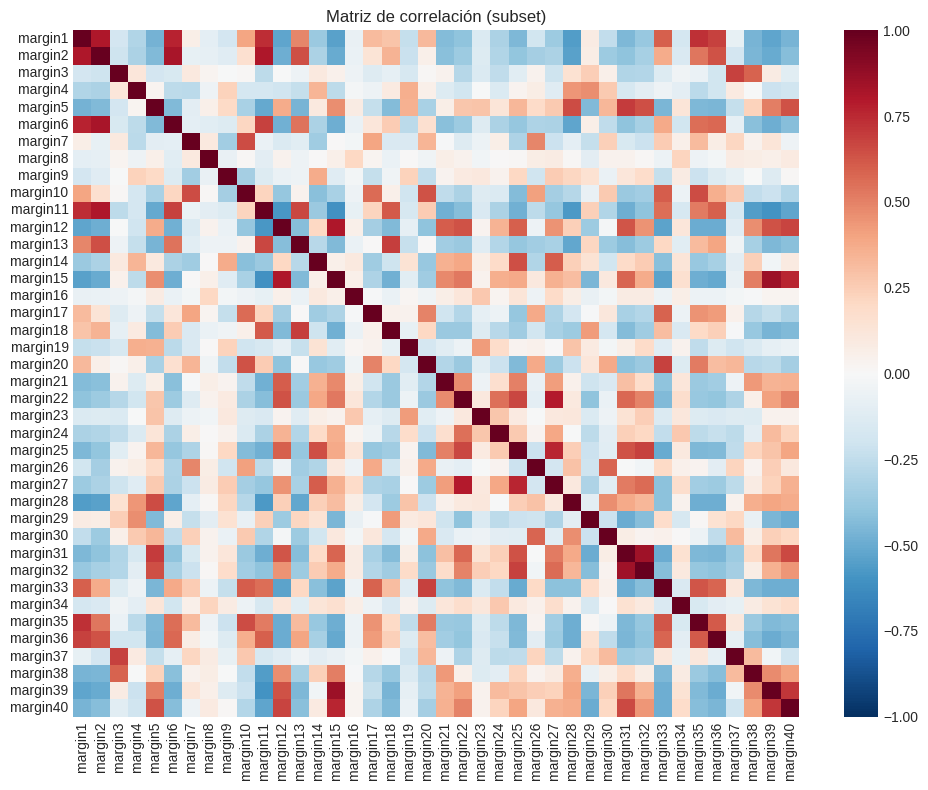


Features con varianza < 1e-5: 68
Ejemplos: ['margin8' 'margin16' 'margin34' 'margin61' 'shape1' 'shape2' 'shape3'
 'shape4' 'shape5' 'shape6' 'shape7' 'shape8' 'shape9' 'shape10' 'shape11'
 'shape12' 'shape13' 'shape14' 'shape15' 'shape16']

--- Valores faltantes (primeras 20 columnas con nulos) ---


,0



Memoria aproximada => train: 0.79 MB, test: 0.44 MB

✔ PASO 1 completado (EDA listo).


In [58]:


plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

TRAIN_PATH = '/content/sample_data/train.csv.zip'
TEST_PATH  = '/content/sample_data/test.csv.zip'


def load_csv_float32(path, nrows=None):
    """Lee un CSV y convierte columnas float64 -> float32 para ahorrar RAM."""
    df = pd.read_csv(path, nrows=nrows)
    float_cols = df.select_dtypes(include=['float64']).columns
    df[float_cols] = df[float_cols].astype(np.float32)
    return df

print("Cargando train...")
train = load_csv_float32(TRAIN_PATH)
print("Cargando test...")
test = load_csv_float32(TEST_PATH)



print("\n--- Shapes ---")
print("train:", train.shape)
print("test :", test.shape)

print("\n--- Columnas (primeras 20) ---")
print(train.columns[:20].tolist(), "... total:", len(train.columns))

print("\n--- Primeras filas de train ---")
display(train.head())


if 'species' in train.columns:
    vc = train['species'].value_counts()
    print("\nNúmero de clases:", len(vc))

    plt.figure(figsize=(12,5))
    sns.barplot(x=vc.index, y=vc.values)
    plt.xticks(rotation=90, fontsize=7)
    plt.ylabel("Conteo")
    plt.title("Distribución por clase (train)")
    plt.tight_layout()
    plt.show()
else:
    print("No se encontró la columna 'species' en train.")


num_cols = train.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c != "id"]

print("\n--- Estadísticas de las primeras 20 features numéricas ---")
display(train[num_cols[:20]].describe().T)

corr_subset = num_cols[:40]   # puedes ampliar si quieres
print(f"\nCalculando correlación sobre {len(corr_subset)} columnas (subset)...")

corr = train[corr_subset].corr(method='pearson')

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='RdBu_r', vmin=-1, vmax=1, center=0)
plt.title("Matriz de correlación (subset)")
plt.tight_layout()
plt.show()

from sklearn.feature_selection import VarianceThreshold

X_num = train[num_cols].astype(np.float32, copy=False)
selector = VarianceThreshold(threshold=1e-5)
selector.fit(X_num)

low_var_mask = ~selector.get_support()
low_var_features = np.array(num_cols)[low_var_mask]

print(f"\nFeatures con varianza < 1e-5: {len(low_var_features)}")
if len(low_var_features) > 0:
    print("Ejemplos:", low_var_features[:20])


print("\n--- Valores faltantes (primeras 20 columnas con nulos) ---")
missing = train.isnull().sum()
display(missing[missing > 0].sort_values(ascending=False).head(20))


def mem_usage(df):
    return df.memory_usage(deep=True).sum() / 1024**2

print(f"\nMemoria aproximada => train: {mem_usage(train):.2f} MB, test: {mem_usage(test):.2f} MB")

del corr, X_num
gc.collect()

print("\n✔ PASO 1 completado (EDA listo).")



In [9]:


train_path = "/content/sample_data/train.csv.zip"

df = pd.read_csv(train_path)

print("Columnas del dataset:")
print(df.columns)
print("\nPrimeras filas:")
display(df.head())


non_numeric = df.select_dtypes(exclude=["number"]).columns.tolist()

print("\nPosibles columnas target detectadas automáticamente:", non_numeric)


target_col = non_numeric[0]
print(f"\nUsando columna target: {target_col}")


X = df.drop(columns=[target_col])
y = df[target_col]

num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

print("\nColumnas numéricas:", num_cols)
print("Columnas categóricas:", cat_cols)


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))

])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)


X_preprocessed = preprocessor.fit_transform(X)

print("\nPreprocesamiento completado.")
print(f"Dimensión original X: {X.shape}")
print(f"Dimensión procesada X_preprocessed: {X_preprocessed.shape}")



Columnas del dataset:
Index(['id', 'species', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5',
       'margin6', 'margin7', 'margin8',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=194)

Primeras filas:


,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250



Posibles columnas target detectadas automáticamente: ['species']

Usando columna target: species

Columnas numéricas: ['id', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5', 'margin6', 'margin7', 'margin8', 'margin9', 'margin10', 'margin11', 'margin12', 'margin13', 'margin14', 'margin15', 'margin16', 'margin17', 'margin18', 'margin19', 'margin20', 'margin21', 'margin22', 'margin23', 'margin24', 'margin25', 'margin26', 'margin27', 'margin28', 'margin29', 'margin30', 'margin31', 'margin32', 'margin33', 'margin34', 'margin35', 'margin36', 'margin37', 'margin38', 'margin39', 'margin40', 'margin41', 'margin42', 'margin43', 'margin44', 'margin45', 'margin46', 'margin47', 'margin48', 'margin49', 'margin50', 'margin51', 'margin52', 'margin53', 'margin54', 'margin55', 'margin56', 'margin57', 'margin58', 'margin59', 'margin60', 'margin61', 'margin62', 'margin63', 'margin64', 'shape1', 'shape2', 'shape3', 'shape4', 'shape5', 'shape6', 'shape7', 'shape8', 'shape9', 'shape10', 'shape11', 'sh

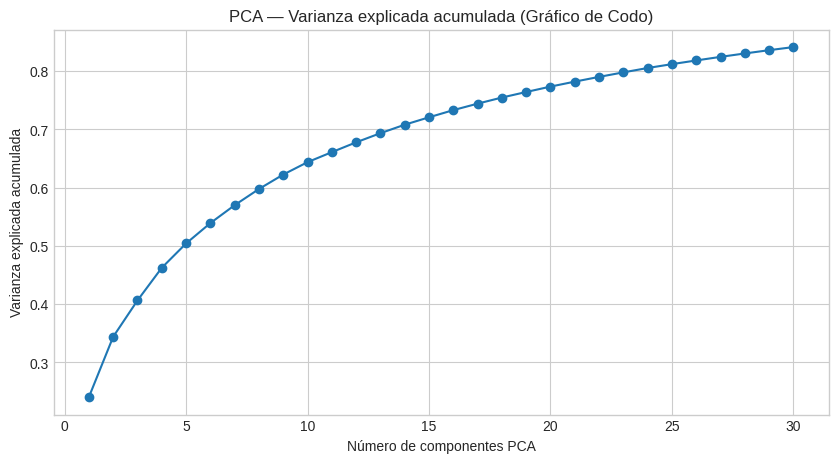

Componentes 1: 24.03% varianza explicada
Componentes 2: 34.39% varianza explicada
Componentes 3: 40.63% varianza explicada
Componentes 4: 46.24% varianza explicada
Componentes 5: 50.42% varianza explicada
Componentes 6: 53.92% varianza explicada
Componentes 7: 56.99% varianza explicada
Componentes 8: 59.77% varianza explicada
Componentes 9: 62.25% varianza explicada
Componentes 10: 64.38% varianza explicada

Componentes necesarios para explicar el 95% de la varianza: 1

Dimensión después de PCA: (990, 1)

Dimensión después de SelectKBest: (990, 1)

RESUMEN DEL PASO 3
PCA: 1 componentes → (990, 1)
SelectKBest: 1 features → (990, 1)
RF Importance: mostrado arriba.


In [59]:
# ============================================================
# PASO 3 — REDUCCIÓN DE DIMENSIONALIDAD Y SELECCIÓN DE FEATURES
# ============================================================

plt.style.use('seaborn-v0_8-whitegrid')

max_components = min(30, X_preprocessed.shape[1])

pca = PCA(n_components=max_components)
pca.fit(X_preprocessed)

explained_var = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, max_components + 1), explained_var, marker='o')
plt.title("PCA — Varianza explicada acumulada (Gráfico de Codo)")
plt.xlabel("Número de componentes PCA")
plt.ylabel("Varianza explicada acumulada")
plt.grid(True)
plt.show()

for i, v in enumerate(explained_var[:10]):
    print(f"Componentes {i+1}: {v*100:.2f}% varianza explicada")

# PCA con 95% de varianza explicada
n_components_95 = np.argmax(explained_var >= 0.95) + 1
print(f"\nComponentes necesarios para explicar el 95% de la varianza: {n_components_95}")

pca_final = PCA(n_components=n_components_95)
X_pca = pca_final.fit_transform(X_preprocessed)

print("\nDimensión después de PCA:", X_pca.shape)

k_value = n_components_95

selector = SelectKBest(score_func=f_classif, k=k_value)
X_kbest = selector.fit_transform(X_preprocessed, y)

print("\nDimensión después de SelectKBest:", X_kbest.shape)


print("\n=======================================")
print("RESUMEN DEL PASO 3")
print("=======================================")
print(f"PCA: {n_components_95} componentes → {X_pca.shape}")
print(f"SelectKBest: {k_value} features → {X_kbest.shape}")
print("RF Importance: mostrado arriba.")



In [61]:
# ===========================
# ESCALADO
# ===========================

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Escalado correcto. X_scaled definido con shape:", X_scaled.shape)


# ===========================
# 4.1 SELECTKBEST
# ===========================

selector_kbest = SelectKBest(score_func=f_classif, k=10)
X_new_kbest = selector_kbest.fit_transform(X_scaled, y)

mask_kbest = selector_kbest.get_support()
selected_features_kbest = X.columns[mask_kbest]

print("\nCaracterísticas seleccionadas con SelectKBest:")
print(selected_features_kbest)



Escalado correcto. X_scaled definido con shape: (990, 193)

Características seleccionadas con SelectKBest:
Index(['shape15', 'shape16', 'shape17', 'shape18', 'shape19', 'shape47',
       'shape48', 'shape49', 'shape50', 'shape51'],
      dtype='object')


Importancia de características con Random Forest:
       Feature  Importance
48    margin48    0.010263
137   texture9    0.008583
13    margin13    0.008429
113    shape49    0.008426
141  texture13    0.008311
..         ...         ...
61    margin61    0.000904
0           id    0.000883
8      margin8    0.000741
34    margin34    0.000512
16    margin16    0.000330

[193 rows x 2 columns]


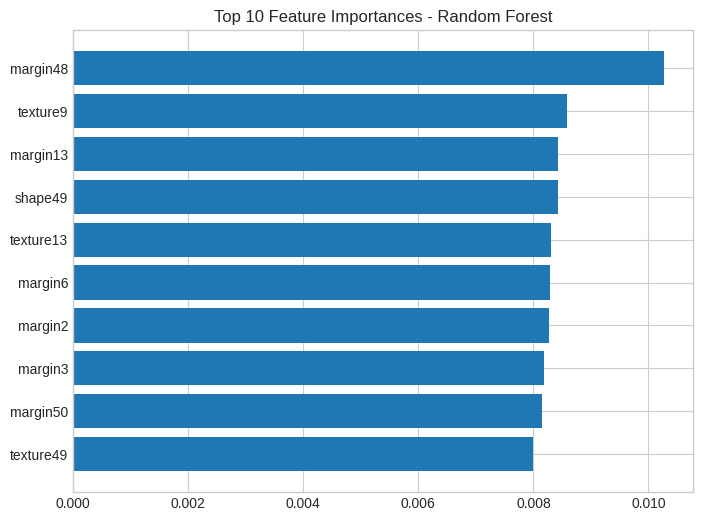

In [14]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Entrenar modelo
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_scaled, y)

# Importancias
importances = rf.feature_importances_

# DataFrame ordenado
feat_imp = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("Importancia de características con Random Forest:")
print(feat_imp)

# Gráfico
plt.figure(figsize=(8,6))
plt.barh(feat_imp["Feature"].head(10), feat_imp["Importance"].head(10))
plt.title("Top 10 Feature Importances - Random Forest")
plt.gca().invert_yaxis()
plt.show()


In [15]:
from sklearn.linear_model import LogisticRegression

# Modelo L1
lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=500)
lasso.fit(X_scaled, y)

coef = lasso.coef_[0]

# Identificar las características seleccionadas
selected_l1 = X.columns[coef != 0]

print("Características seleccionadas con L1 (Lasso):")
print(selected_l1)


Características seleccionadas con L1 (Lasso):
Index(['margin7', 'margin22', 'margin26', 'margin29', 'margin39', 'margin43',
       'margin44', 'margin47', 'margin53', 'margin56', 'shape1', 'texture2',
       'texture8', 'texture9', 'texture17', 'texture20', 'texture30',
       'texture35', 'texture38', 'texture48', 'texture63'],
      dtype='object')


In [16]:
# ============================================
# PASO 4 – División del dataset y estrategia de evaluación
# ============================================

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, balanced_accuracy_score, confusion_matrix, classification_report
)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de prueba:", X_test.shape)

# ======================================================
# 2. Configuración de StratifiedKFold para modelos
# ======================================================

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print("\nStratifiedKFold listo para usar en búsqueda de hiperparámetros.")

# ======================================================
# 3. Función de evaluación — métricas principales
#    (Accuracy, Precision, Recall, F1-macro, Balanced Acc)
# ======================================================

def evaluar_modelo(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print("\n===== RESULTADOS DEL MODELO =====")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision (macro): {prec:.4f}")
    print(f"Recall (macro): {rec:.4f}")
    print(f"F1-score (macro): {f1:.4f}")
    print(f"Balanced Accuracy: {bal_acc:.4f}")
    print("\nMatriz de Confusión:\n", cm)
    print("\nReporte de Clasificación:\n")
    print(classification_report(y_test, y_pred, zero_division=0))

    return {
        "accuracy": acc,
        "precision_macro": prec,
        "recall_macro": rec,
        "f1_macro": f1,
        "balanced_accuracy": bal_acc,
        "confusion_matrix": cm
    }

print("\nLa función evaluar_modelo() está lista para usarse en el Paso 5.")


Tamaño de entrenamiento: (792, 193)
Tamaño de prueba: (198, 193)

StratifiedKFold listo para usar en búsqueda de hiperparámetros.

La función evaluar_modelo() está lista para usarse en el Paso 5.


In [28]:
# ===============================================
# BASELINE: Logistic Regression (multinomial)
# ===============================================

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Definir modelo baseline
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=5000)

# Espacio de búsqueda (ligero porque es baseline)
params_lr = {
    'C': np.logspace(-3, 2, 10),
    'penalty': ['l1', 'l2']
}

random_search_lr = RandomizedSearchCV(
    log_reg,
    params_lr,
    n_iter=10,
    scoring='f1_macro',
    cv=skf,
    n_jobs=-1,
    verbose=1
)

random_search_lr.fit(X_train, y_train)

print("\n=== MEJOR BASELINE Logistic Regression ===")
print("Mejores hiperparámetros:", random_search_lr.best_params_)
print("Mejor f1_macro CV:", random_search_lr.best_score_)

# Evaluación en test
result_baseline = evaluar_modelo(random_search_lr.best_estimator_, X_test, y_test)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



=== MEJOR BASELINE Logistic Regression ===
Mejores hiperparámetros: {'penalty': 'l2', 'C': np.float64(100.0)}
Mejor f1_macro CV: 0.9762962962962962

===== RESULTADOS DEL MODELO =====
Accuracy: 0.9949
Precision (macro): 0.9966
Recall (macro): 0.9949
F1-score (macro): 0.9946
Balanced Accuracy: 0.9949

Matriz de Confusión:
 [[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.

In [18]:

# MODELO 1: Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

params_rf = {
    'n_estimators': [200, 400, 600, 800],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

random_search_rf = RandomizedSearchCV(
    rf,
    params_rf,
    n_iter=20,
    scoring='f1_macro',
    cv=skf,
    n_jobs=-1,
    verbose=1
)

random_search_rf.fit(X_train, y_train)

print("\n=== MEJOR Random Forest ===")
print("Mejores hiperparámetros:", random_search_rf.best_params_)
print("Mejor f1_macro CV:", random_search_rf.best_score_)

# Evaluación en test
result_rf = evaluar_modelo(random_search_rf.best_estimator_, X_test, y_test)


Fitting 5 folds for each of 20 candidates, totalling 100 fits

=== MEJOR Random Forest ===
Mejores hiperparámetros: {'n_estimators': 800, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 30}
Mejor f1_macro CV: 0.9802020202020202

===== RESULTADOS DEL MODELO =====
Accuracy: 0.9798
Precision (macro): 0.9865
Recall (macro): 0.9798
F1-score (macro): 0.9795
Balanced Accuracy: 0.9798

Matriz de Confusión:
 [[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]

Reporte de Clasificación:

                              precision    recall  f1-score   support

             Acer_Capillipes       1.00      1.00      1.00         2
             Acer_Circinatum       1.00      1.00      1.00         2
                   Acer_Mono       1.00      1.00      1.00         2
                 Acer_Opalus       1.00      1.00      1.00         2
               Acer_Palmatum       1.00      1.00      1.00         2
               

In [20]:
# ===============================================
# MODELO 3: SVM con kernel RBF
# ===============================================

from sklearn.svm import SVC

svm = SVC(kernel='rbf')

params_svm = {
    'C': np.logspace(-2, 3, 10),
    'gamma': np.logspace(-3, 1, 10)
}

random_search_svm = RandomizedSearchCV(
    svm,
    params_svm,
    n_iter=20,
    scoring='f1_macro',
    cv=skf,
    n_jobs=-1,
    verbose=1
)

random_search_svm.fit(X_train, y_train)

print("\n=== MEJOR SVM RBF ===")
print("Mejores hiperparámetros:", random_search_svm.best_params_)
print("Mejor f1_macro CV:", random_search_svm.best_score_)

result_svm = evaluar_modelo(random_search_svm.best_estimator_, X_test, y_test)


Fitting 5 folds for each of 20 candidates, totalling 100 fits

=== MEJOR SVM RBF ===
Mejores hiperparámetros: {'gamma': np.float64(0.0027825594022071257), 'C': np.float64(21.544346900318846)}
Mejor f1_macro CV: 0.977979797979798

===== RESULTADOS DEL MODELO =====
Accuracy: 0.9949
Precision (macro): 0.9966
Recall (macro): 0.9949
F1-score (macro): 0.9946
Balanced Accuracy: 0.9949

Matriz de Confusión:
 [[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]

Reporte de Clasificación:

                              precision    recall  f1-score   support

             Acer_Capillipes       1.00      1.00      1.00         2
             Acer_Circinatum       1.00      1.00      1.00         2
                   Acer_Mono       1.00      1.00      1.00         2
                 Acer_Opalus       1.00      1.00      1.00         2
               Acer_Palmatum       1.00      1.00      1.00         2
                 Acer_Pictu

In [34]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# LOGISTIC REGRESSION

param_logreg = {
    "C": [0.1, 1, 10],
    "solver": ["lbfgs"],
    "max_iter": [500]
}

logreg = LogisticRegression(multi_class="multinomial")
grid_logreg = GridSearchCV(
    logreg,
    param_logreg,
    scoring="f1_macro",
    cv=cv,
    n_jobs=-1
)
grid_logreg.fit(X_train, y_train)
best_logreg = grid_logreg.best_estimator_

print("Logistic Regression listo.")


# RANDOM FOREST

param_rf = {
    "n_estimators": [200, 400],
    "max_depth": [10, 20, None],
}

rf = RandomForestClassifier()
grid_rf = GridSearchCV(
    rf,
    param_rf,
    scoring="f1_macro",
    cv=cv,
    n_jobs=-1
)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

print("Random Forest listo.")



# SVM

param_svm = {
    "C": [0.1, 1, 10],
    "kernel": ["rbf"],
    "gamma": ["scale"]
}

svm = SVC()
grid_svm = GridSearchCV(
    svm,
    param_svm,
    scoring="f1_macro",
    cv=cv,
    n_jobs=-1
)
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_

print("SVM listo.")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression listo.
Random Forest listo.
SVM listo.



📌 RESULTADOS: LogisticRegression

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00

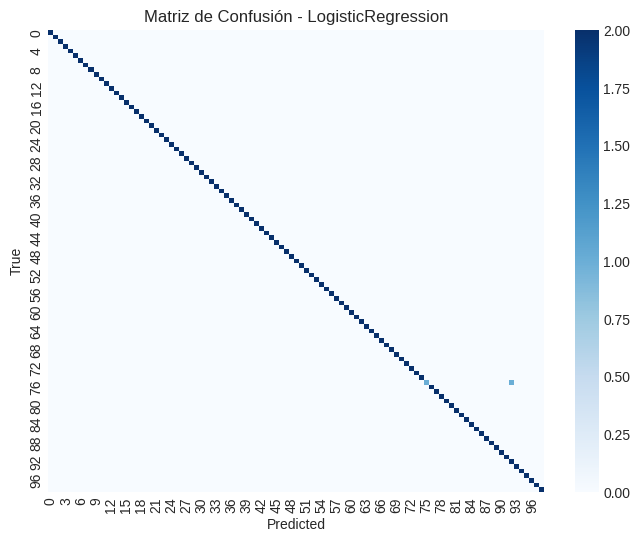


📌 RESULTADOS: RandomForest

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       0.67      1.00      0.80         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      

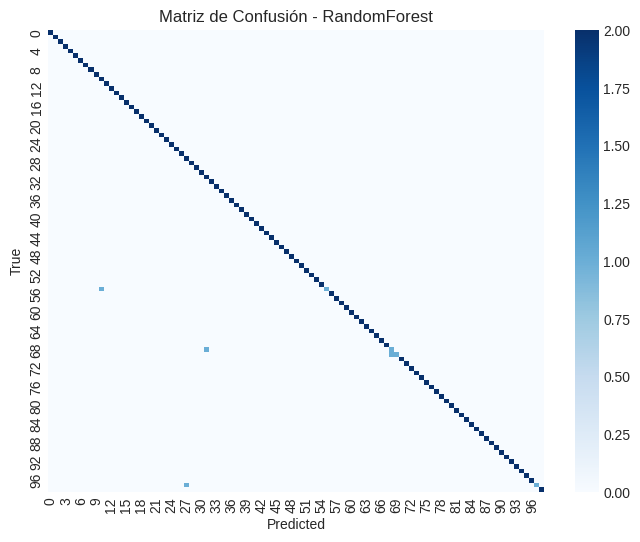


📌 RESULTADOS: SVM

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00     

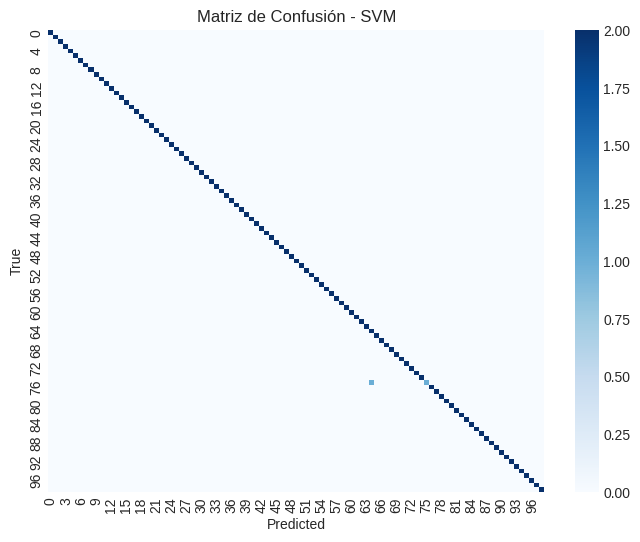



=== COMPARACIÓN FINAL DE MODELOS ===


,Accuracy,Precision_macro,Recall_macro,F1_macro,Balanced_Accuracy
LogisticRegression,0.994949,0.996633,0.994949,0.994613,0.994949
RandomForest,0.979798,0.984848,0.979798,0.978788,0.979798
SVM,0.994949,0.996633,0.994949,0.994613,0.994949


In [35]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, balanced_accuracy_score, confusion_matrix, classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt


final_models = {
    "LogisticRegression": best_logreg,
    "RandomForest": best_rf,
    "SVM": best_svm,

}


results = {}


for model_name, model in final_models.items():

    y_pred = model.predict(X_test)

    results[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision_macro": precision_score(y_test, y_pred, average='macro'),
        "Recall_macro": recall_score(y_test, y_pred, average='macro'),
        "F1_macro": f1_score(y_test, y_pred, average='macro'),
        "Balanced_Accuracy": balanced_accuracy_score(y_test, y_pred),
    }

    # Mostrar reporte completo
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # MATRIZ DE CONFUSIÓN
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, cmap="Blues", annot=False)
    plt.title(f"Matriz de Confusión - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

import pandas as pd

df_results = pd.DataFrame(results).T
print("\n\n=== COMPARACIÓN FINAL DE MODELOS ===")
display(df_results)


=== EVALUACIÓN FINAL DE MODELOS ===


   Modelo: LogisticRegression
Accuracy: 0.9949
Balanced Accuracy: 0.9949
F1-score macro: 0.9946

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.

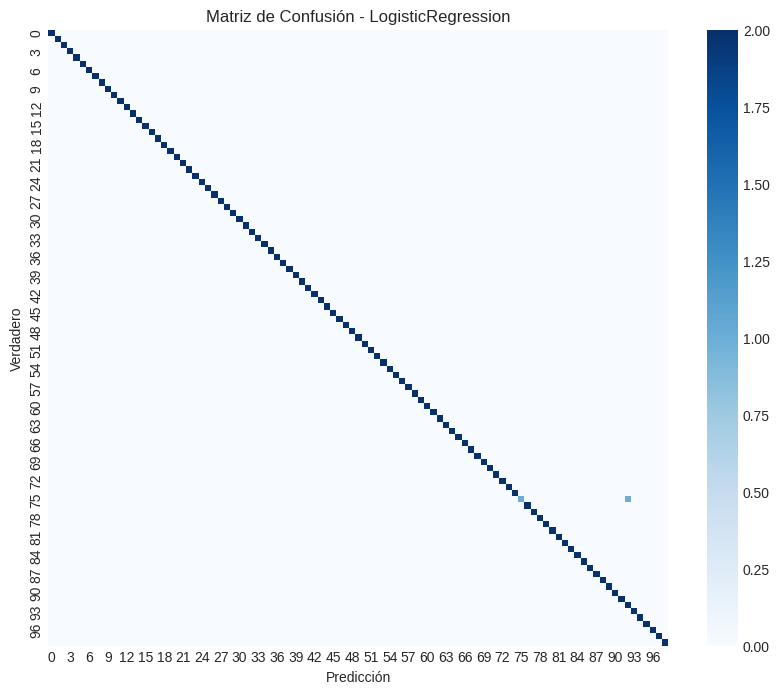


   Modelo: RandomForest
Accuracy: 0.9798
Balanced Accuracy: 0.9798
F1-score macro: 0.9788

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       0.67      1.00      0.80         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1

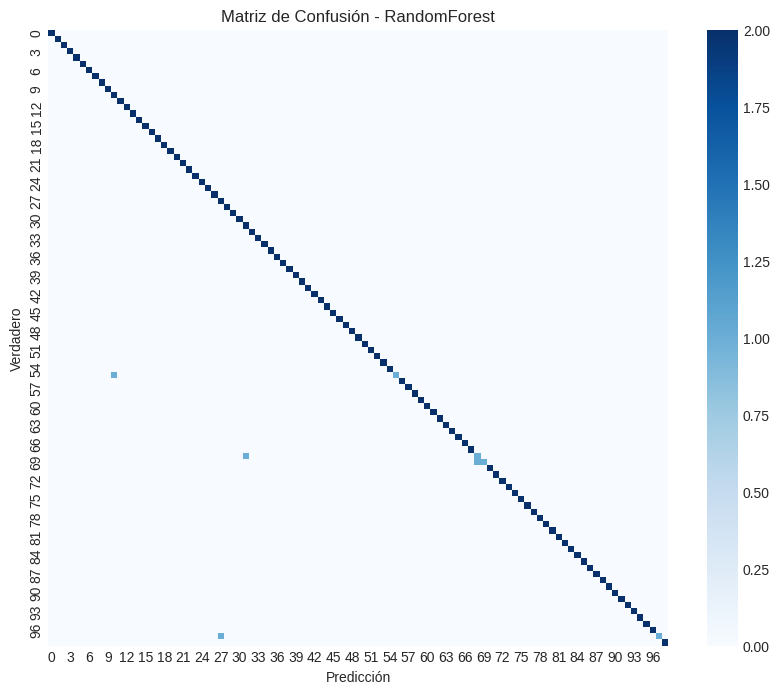


   Modelo: SVM
Accuracy: 0.9949
Balanced Accuracy: 0.9949
F1-score macro: 0.9946

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      

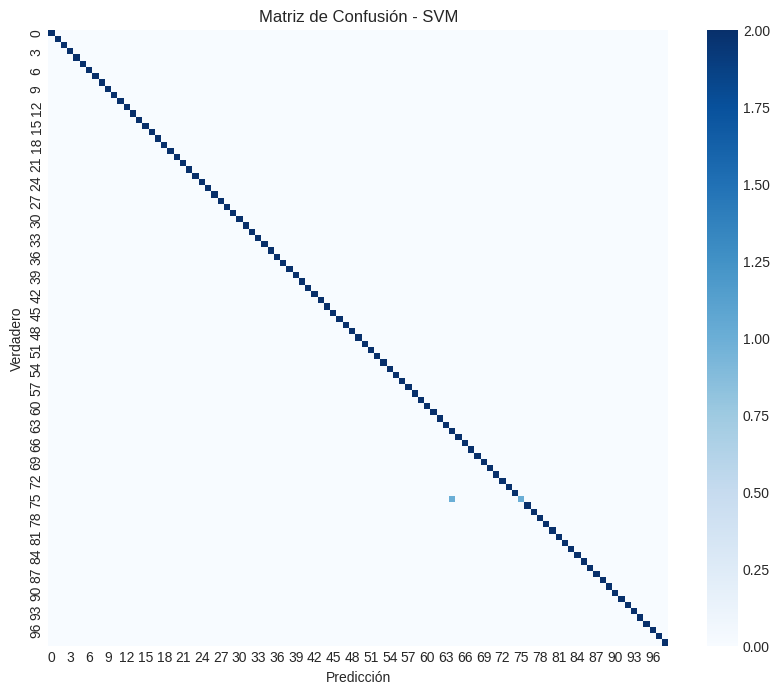


   Modelo: MLP
Accuracy: 0.9798
Balanced Accuracy: 0.9798
F1-score macro: 0.9785

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      

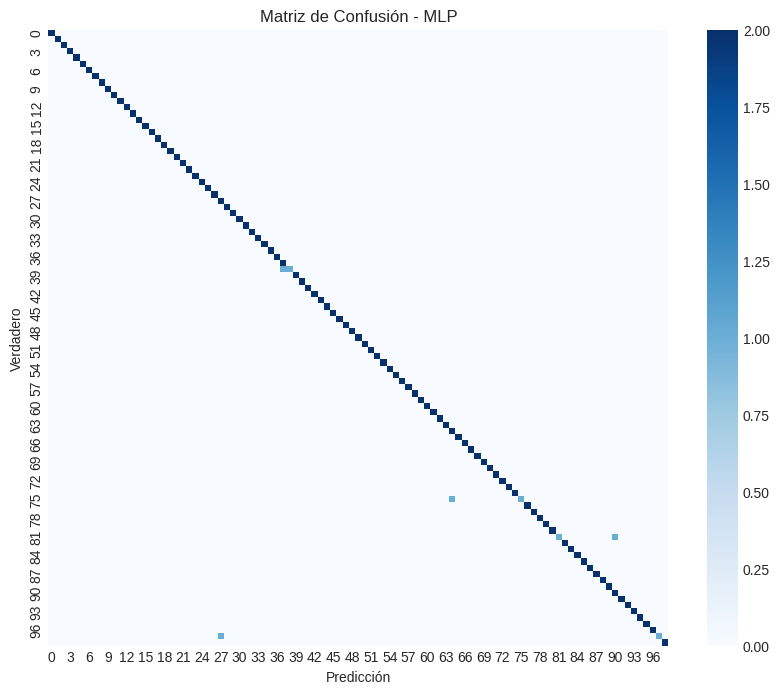



=== COMPARACIÓN GLOBAL DE MODELOS ===

LogisticRegression:
  Accuracy: 0.9949
  Balanced Accuracy: 0.9949
  F1-macro: 0.9946

RandomForest:
  Accuracy: 0.9798
  Balanced Accuracy: 0.9798
  F1-macro: 0.9788

SVM:
  Accuracy: 0.9949
  Balanced Accuracy: 0.9949
  F1-macro: 0.9946

MLP:
  Accuracy: 0.9798
  Balanced Accuracy: 0.9798
  F1-macro: 0.9785


>>> MEJOR MODELO POR F1-MACRO: LogisticRegression


In [38]:
# ======================================================
# PASO 7 - Evaluación final y comparación de modelos
# ======================================================

from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Diccionario de modelos
final_models = {
    "LogisticRegression": best_logreg,
    "RandomForest": best_rf,
    "SVM": best_svm,
    "MLP": best_mlp
}

# Diccionario para almacenar resultados
results = {}

print("=== EVALUACIÓN FINAL DE MODELOS ===\n")

for name, model in final_models.items():
    print(f"\n====================================")
    print(f"   Modelo: {name}")
    print("====================================")

    # Predicciones
    y_pred = model.predict(X_test)

    # Métricas
    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    # Guardar métricas
    results[name] = {
        "Accuracy": acc,
        "Balanced Accuracy": bal_acc,
        "F1-macro": f1
    }

    print(f"Accuracy: {acc:.4f}")
    print(f"Balanced Accuracy: {bal_acc:.4f}")
    print(f"F1-score macro: {f1:.4f}\n")

    # Classification report (resumen de calidad por clase)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10,8))
    sns.heatmap(cm, cmap="Blues", annot=False)
    plt.title(f"Matriz de Confusión - {name}")
    plt.xlabel("Predicción")
    plt.ylabel("Verdadero")
    plt.show()


# ======================================================
# Comparación global de modelos
# ======================================================

print("\n\n=== COMPARACIÓN GLOBAL DE MODELOS ===")
for name, metrics in results.items():
    print(f"\n{name}:")
    for m_name, value in metrics.items():
        print(f"  {m_name}: {value:.4f}")

# Identificar mejor modelo por F1-macro
best_model_name = max(results, key=lambda x: results[x]["F1-macro"])
print(f"\n\n>>> MEJOR MODELO POR F1-MACRO: {best_model_name}")
best_model = final_models[best_model_name]


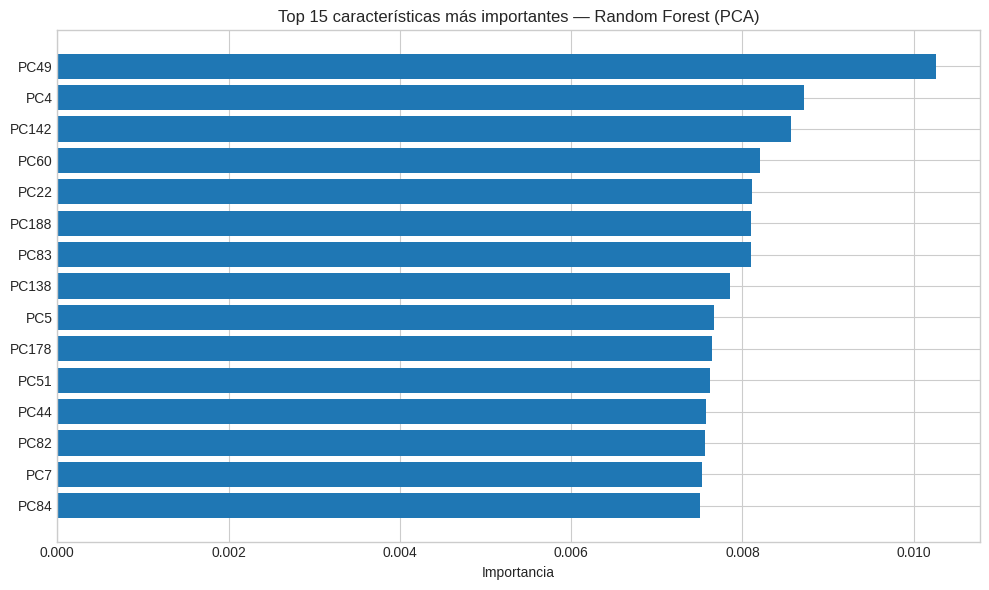

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Nombres correctos de features después de PCA
feature_names = [f"PC{i+1}" for i in range(X_train.shape[1])]

importances = best_rf.feature_importances_

# Seleccionar top 15
top_n = 15
indices = np.argsort(importances)[-top_n:]

plt.figure(figsize=(10, 6))
plt.barh(range(top_n), importances[indices])
plt.yticks(range(top_n), [feature_names[i] for i in indices])
plt.title("Top 15 características más importantes — Random Forest (PCA)")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()


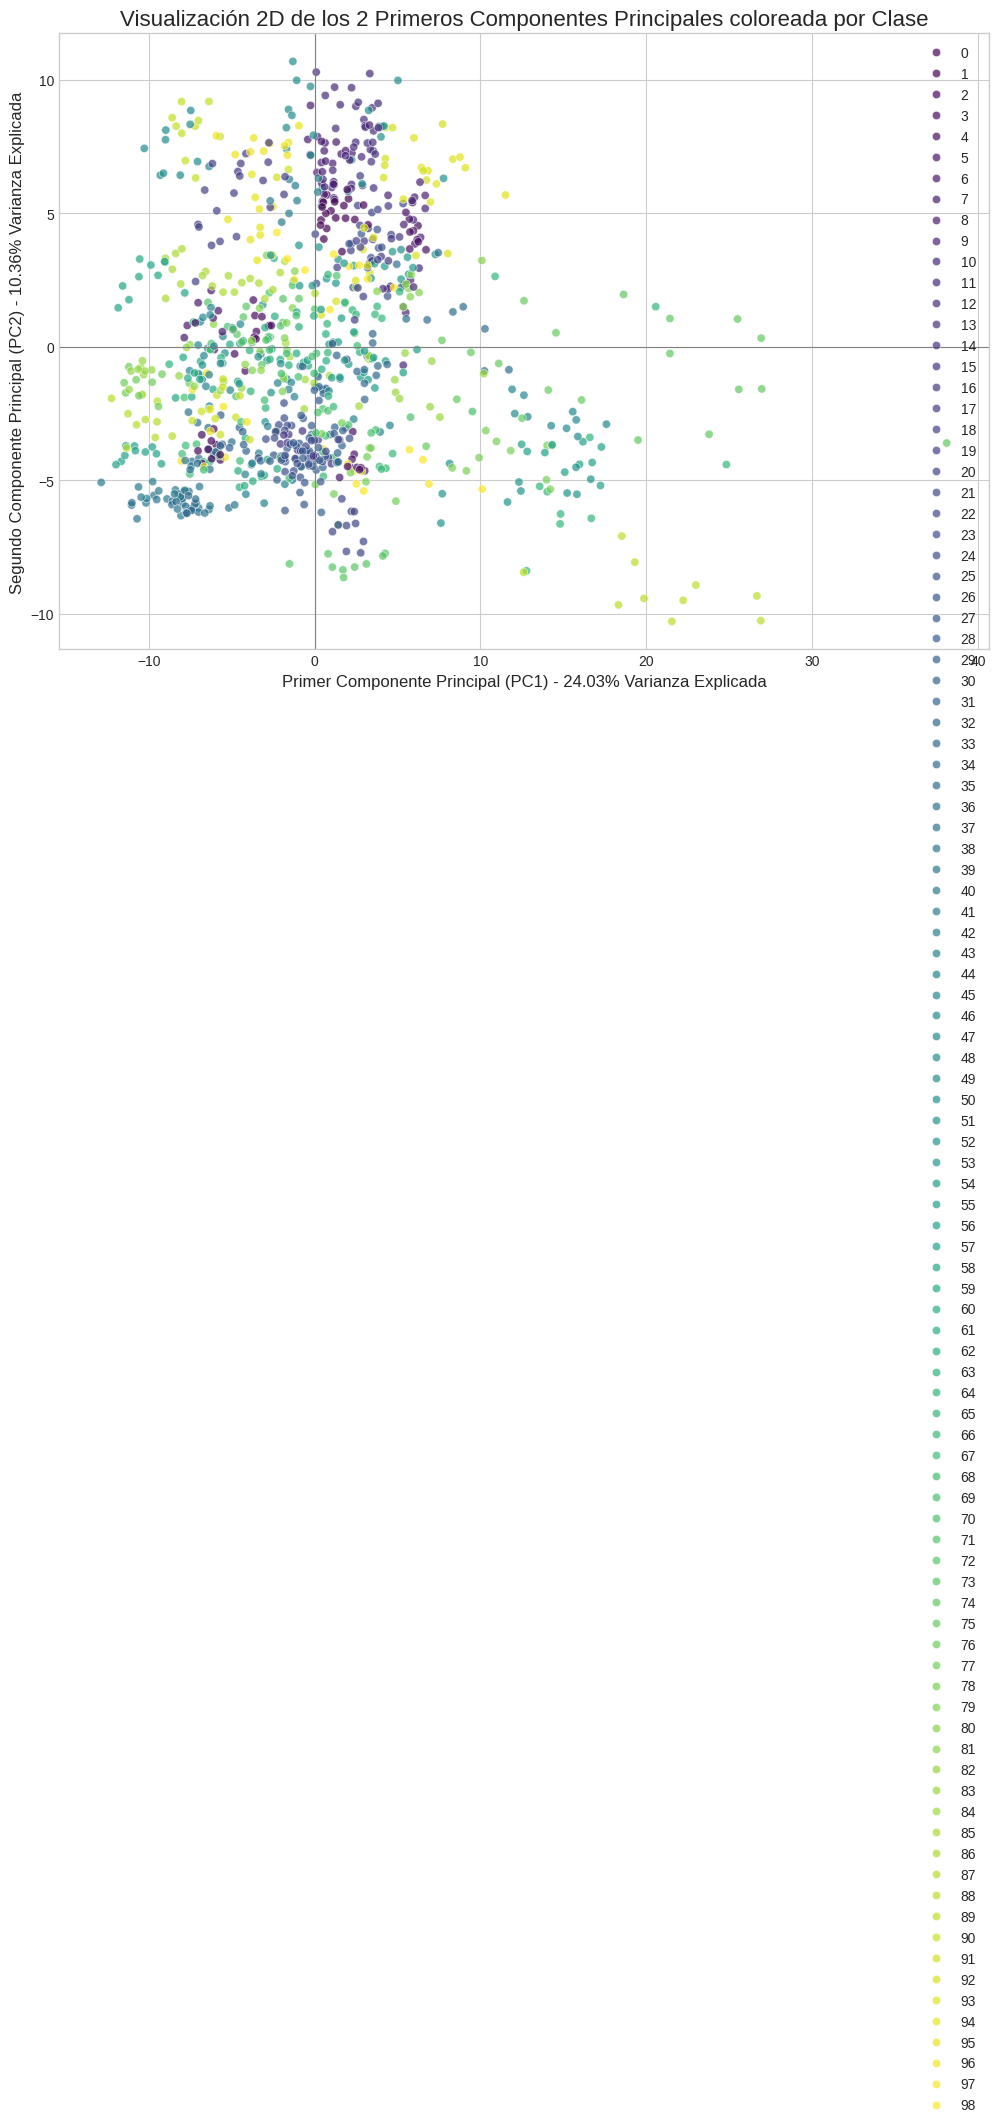

In [63]:
from sklearn.decomposition import PCA

pca_for_plot = PCA(n_components=2)
X_pca_2d = pca_for_plot.fit_transform(X_preprocessed)

pc1_var = pca_for_plot.explained_variance_ratio_[0] * 100
pc2_var = pca_for_plot.explained_variance_ratio_[1] * 100

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=X_pca_2d[:, 0],
    y=X_pca_2d[:, 1],
    hue=y,
    palette='viridis',
    legend='full',
    alpha=0.7
)

plt.title("Visualización 2D de los 2 Primeros Componentes Principales coloreada por Clase", fontsize=16)
plt.xlabel(f"Primer Componente Principal (PC1) - {pc1_var:.2f}% Varianza Explicada", fontsize=12)
plt.ylabel(f"Segundo Componente Principal (PC2) - {pc2_var:.2f}% Varianza Explicada", fontsize=12)
plt.grid(True)
plt.axhline(0, color='grey', linewidth=0.8)
plt.axvline(0, color='grey', linewidth=0.8)
plt.show()



 5. EVALUACIÓN DE ROBUSTEZ (Degradación bajo Ruido)
Ruido sigma=0.01: Accuracy = 0.3722
Ruido sigma=0.05: Accuracy = 0.3611
Ruido sigma=0.1: Accuracy = 0.3611
Ruido sigma=0.2: Accuracy = 0.3583


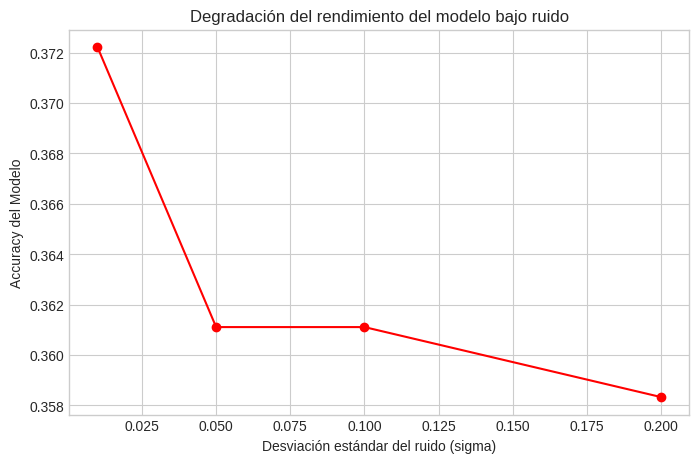

In [75]:


print("\n 5. EVALUACIÓN DE ROBUSTEZ (Degradación bajo Ruido)")

noise_levels = [0.01, 0.05, 0.1, 0.2]
accuracies = []

for sigma in noise_levels:
    # Generar ruido con la forma de los datos de prueba PCA
    noise = np.random.normal(0, sigma, X_test_pca_final.shape)

    # Aplicar el ruido a los datos de prueba
    X_test_noisy = X_test_pca_final + noise

    # Predecir y evaluar la precisión
    y_pred_noisy = log_reg.predict(X_test_noisy)
    acc = accuracy_score(y_test, y_pred_noisy)
    accuracies.append(acc)

    print(f"Ruido sigma={sigma}: Accuracy = {acc:.4f}")

# Gráfico de Degradación
plt.figure(figsize=(8, 5))
plt.plot(noise_levels, accuracies, marker='o', linestyle='-', color='red')
plt.xlabel("Desviación estándar del ruido (sigma)")
plt.ylabel("Accuracy del Modelo")
plt.title("Degradación del rendimiento del modelo bajo ruido")
plt.grid(True)
plt.show()